In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No


In [6]:
print(df.shape)

(59068, 18)


In [7]:
print(df.select_dtypes(include=['object']).columns)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,59068.000000,59068.000000,59040.000000,59068.000000
mean,28.571367,5.281658,4.221528,7.137282
std,6.415493,9.842607,8.439989,1.601112
min,12.210000,0.000000,0.000000,1.000000
25%,24.250000,0.000000,0.000000,6.000000
50%,27.460000,0.000000,0.000000,7.000000
75%,31.750000,5.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59068 entries, 0 to 59067
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      59068 non-null  object 
 1   BMI               59068 non-null  float64
 2   Smoking           59068 non-null  object 
 3   AlcoholDrinking   59068 non-null  object 
 4   Stroke            59068 non-null  object 
 5   PhysicalHealth    59068 non-null  int64  
 6   MentalHealth      59040 non-null  float64
 7   DiffWalking       59068 non-null  object 
 8   Sex               59068 non-null  object 
 9   AgeCategory       59068 non-null  object 
 10  Race              59068 non-null  object 
 11  Diabetic          59068 non-null  object 
 12  PhysicalActivity  59068 non-null  object 
 13  GenHealth         59059 non-null  object 
 14  SleepTime         59068 non-null  int64  
 15  Asthma            59068 non-null  object 
 16  KidneyDisease     59068 non-null  object

In [10]:
df.nunique()

HeartDisease           2
BMI                 2547
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             23
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [11]:
df.isnull().sum()

HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth        28
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            9
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

In [12]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 
                              'Male':1,'Female':0,
                              'No, borderline diabetes':'0',
                              'Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_24728/2971873825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =  df[df.columns].replace({'Yes':1, 'No':0,


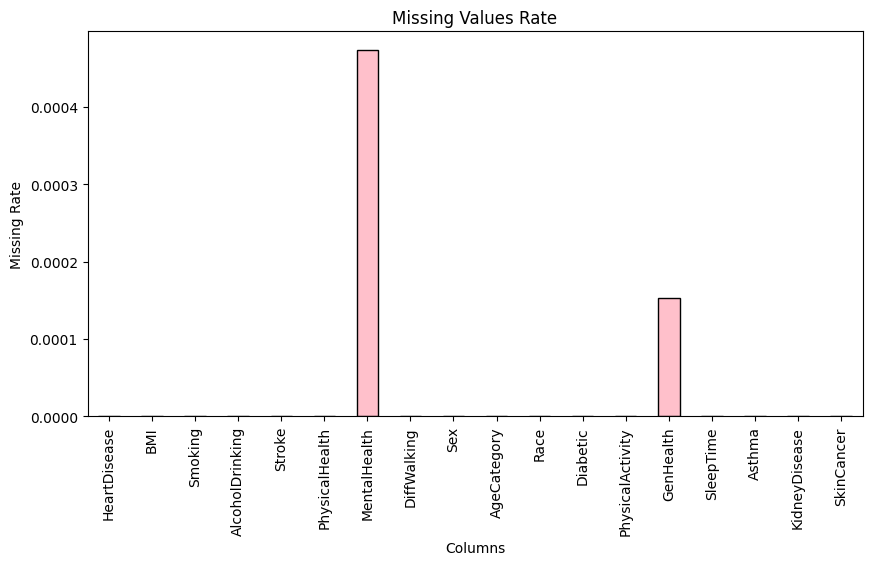

In [13]:
missing_rate = df.isnull().mean()
missing_rate.plot(kind="bar", figsize=(10, 5), color="pink", edgecolor="black")
plt.title("Missing Values Rate")
plt.xlabel("Columns")
plt.ylabel("Missing Rate")
plt.show()

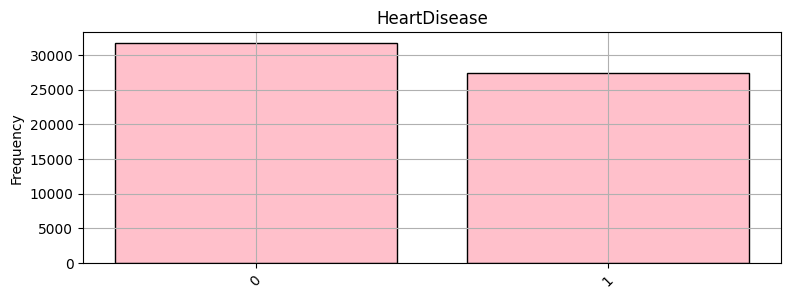

HeartDisease
0    31695
1    27373
Name: count, dtype: int64


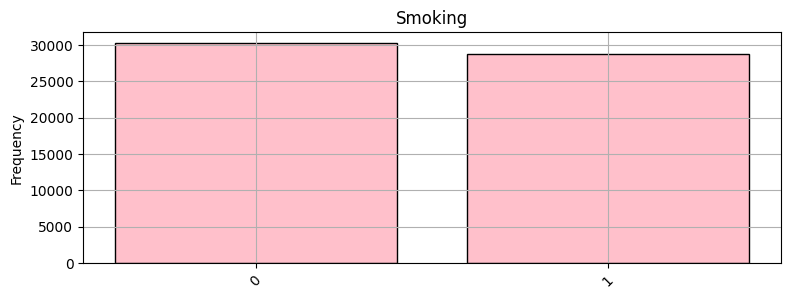

Smoking
0    30267
1    28801
Name: count, dtype: int64


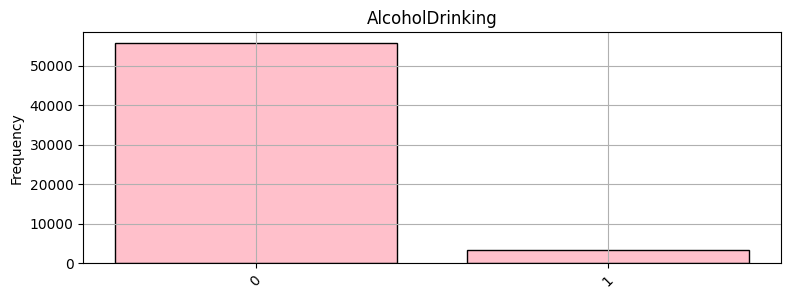

AlcoholDrinking
0    55682
1     3386
Name: count, dtype: int64


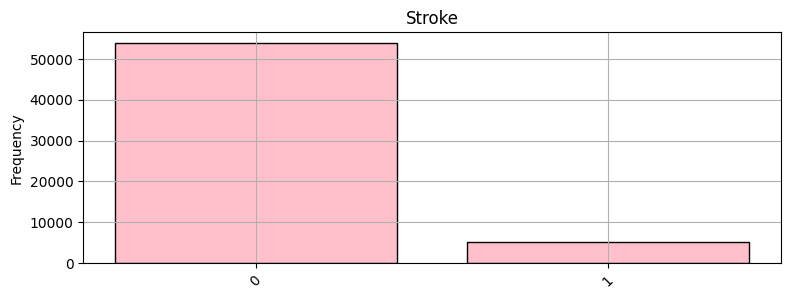

Stroke
0    53869
1     5199
Name: count, dtype: int64


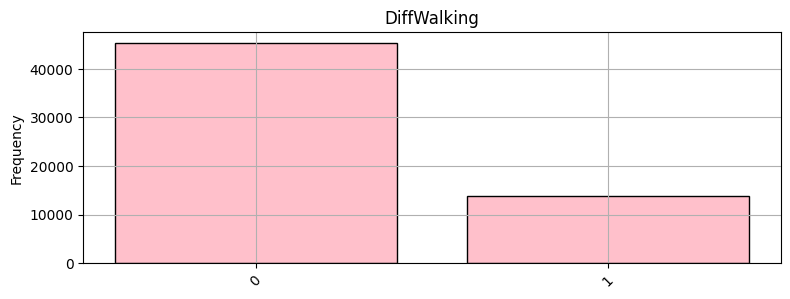

DiffWalking
0    45292
1    13776
Name: count, dtype: int64


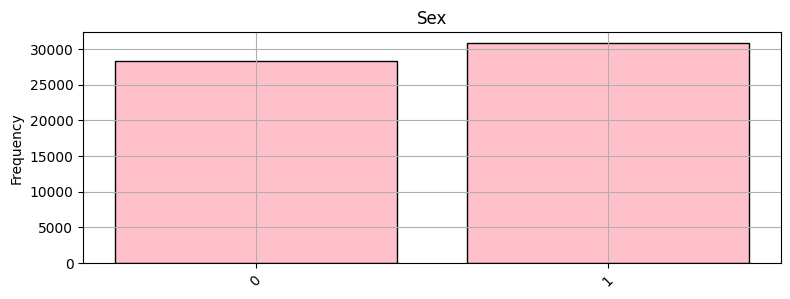

Sex
1    30799
0    28269
Name: count, dtype: int64


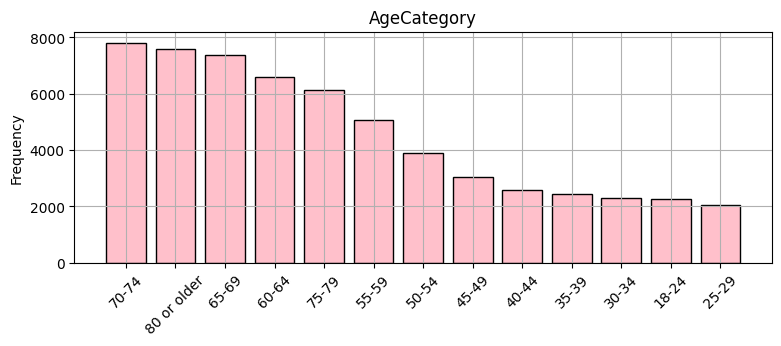

AgeCategory
70-74          7814
80 or older    7580
65-69          7388
60-64          6575
75-79          6116
55-59          5050
50-54          3899
45-49          3045
40-44          2589
35-39          2436
30-34          2279
18-24          2269
25-29          2028
Name: count, dtype: int64


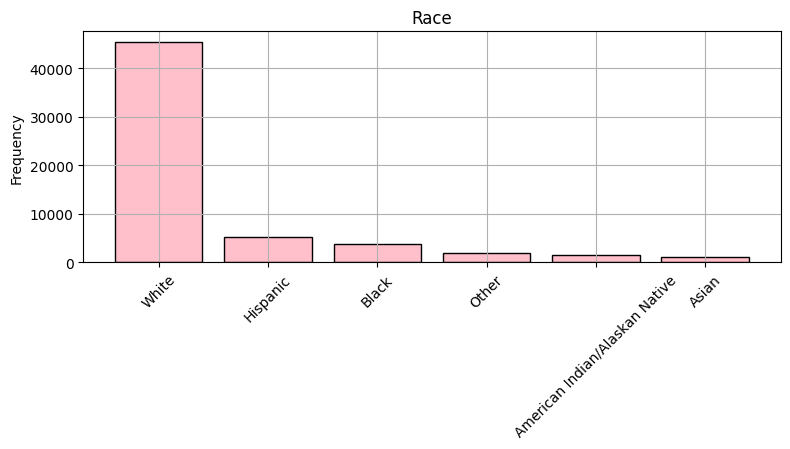

Race
White                             45333
Hispanic                           5328
Black                              3870
Other                              1947
American Indian/Alaskan Native     1535
Asian                              1055
Name: count, dtype: int64


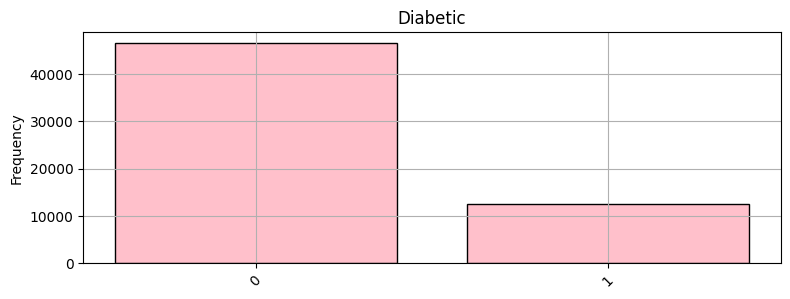

Diabetic
0    46554
1    12514
Name: count, dtype: int64


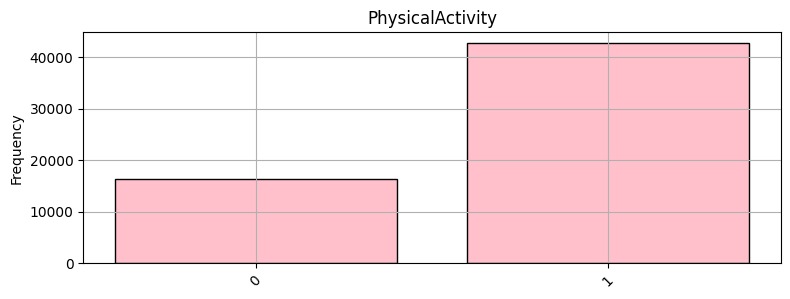

PhysicalActivity
1    42733
0    16335
Name: count, dtype: int64


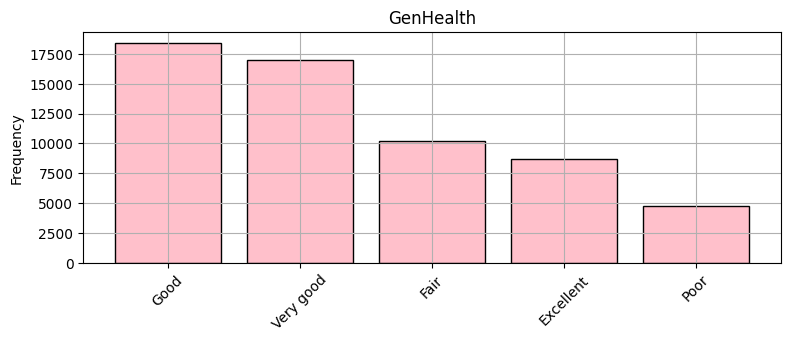

GenHealth
Good         18412
Very good    16983
Fair         10201
Excellent     8734
Poor          4729
Name: count, dtype: int64


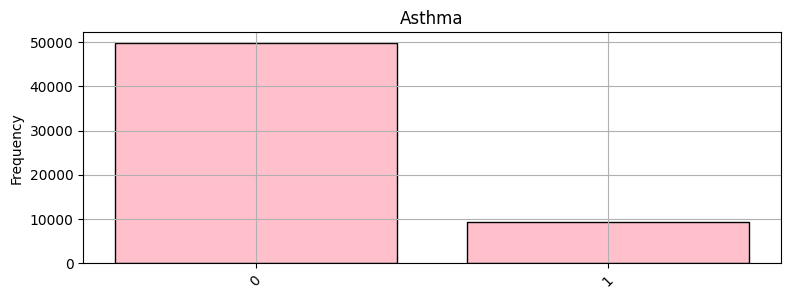

Asthma
0    49799
1     9269
Name: count, dtype: int64


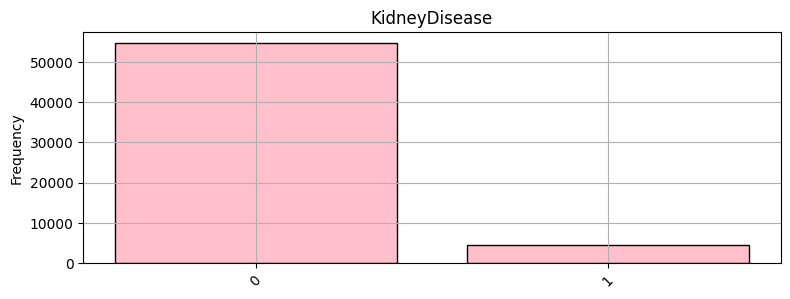

KidneyDisease
0    54676
1     4392
Name: count, dtype: int64


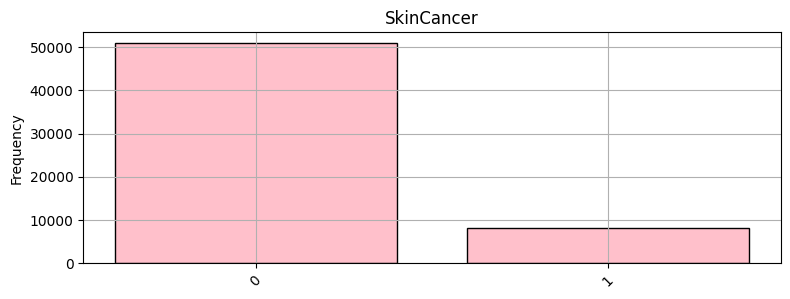

SkinCancer
0    50936
1     8132
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt

category1 = [
    "HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", 
    "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", 
    "Asthma", "KidneyDisease", "SkinCancer"
]

for variable in category1:
    var = df[variable]
    varValue = var.value_counts()

    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue, color="pink", edgecolor="black")
    plt.xticks(varValue.index, varValue.index.values, rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.grid(True)  
    plt.show()
    
    print(varValue)


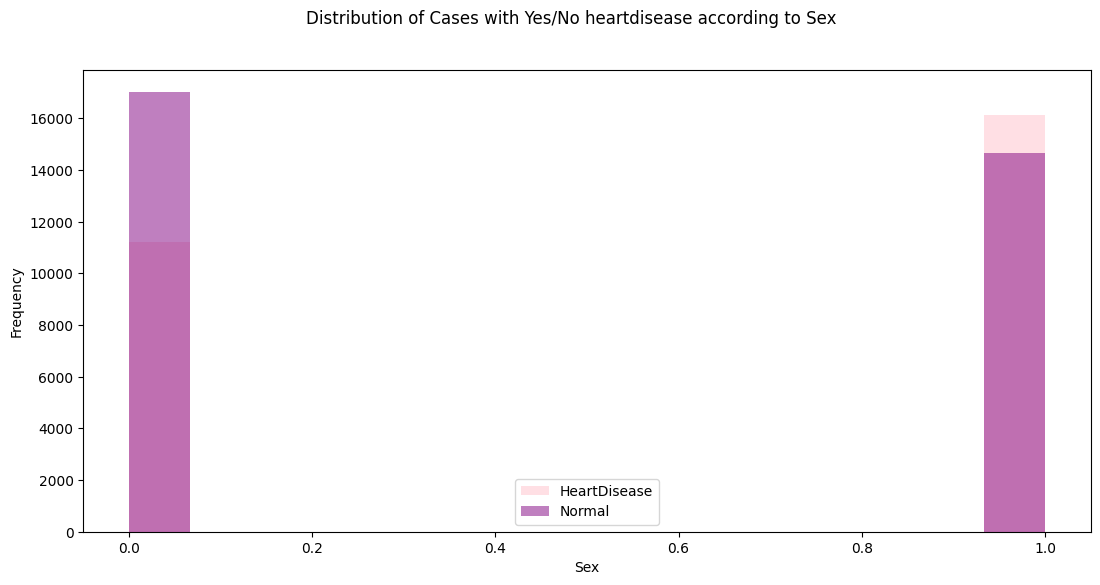

In [15]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="pink", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="purple", label="Normal")
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

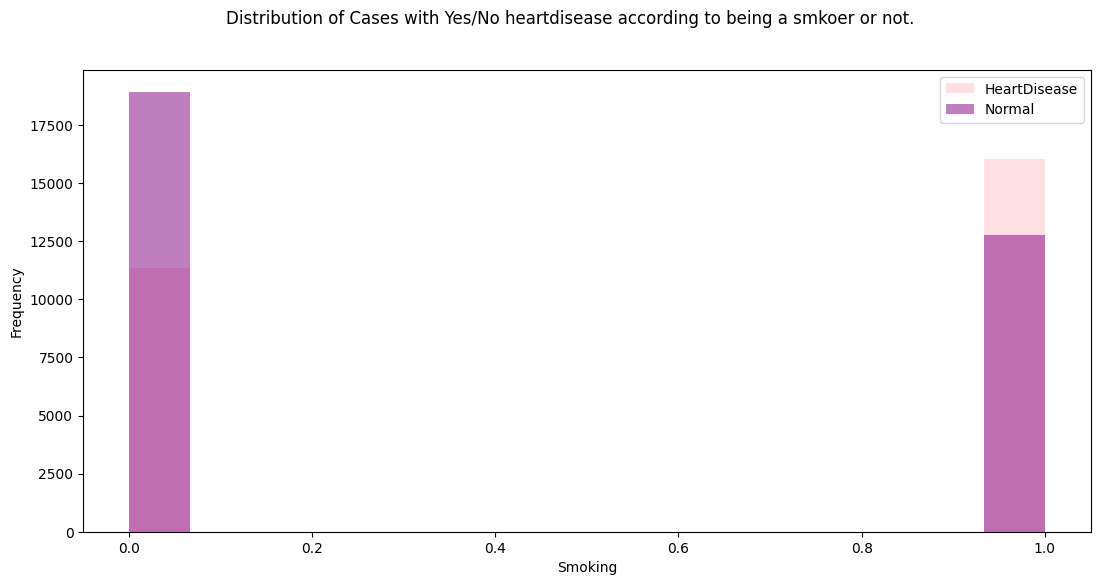

In [16]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="pink", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="purple", label="Normal")
ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

<Axes: >

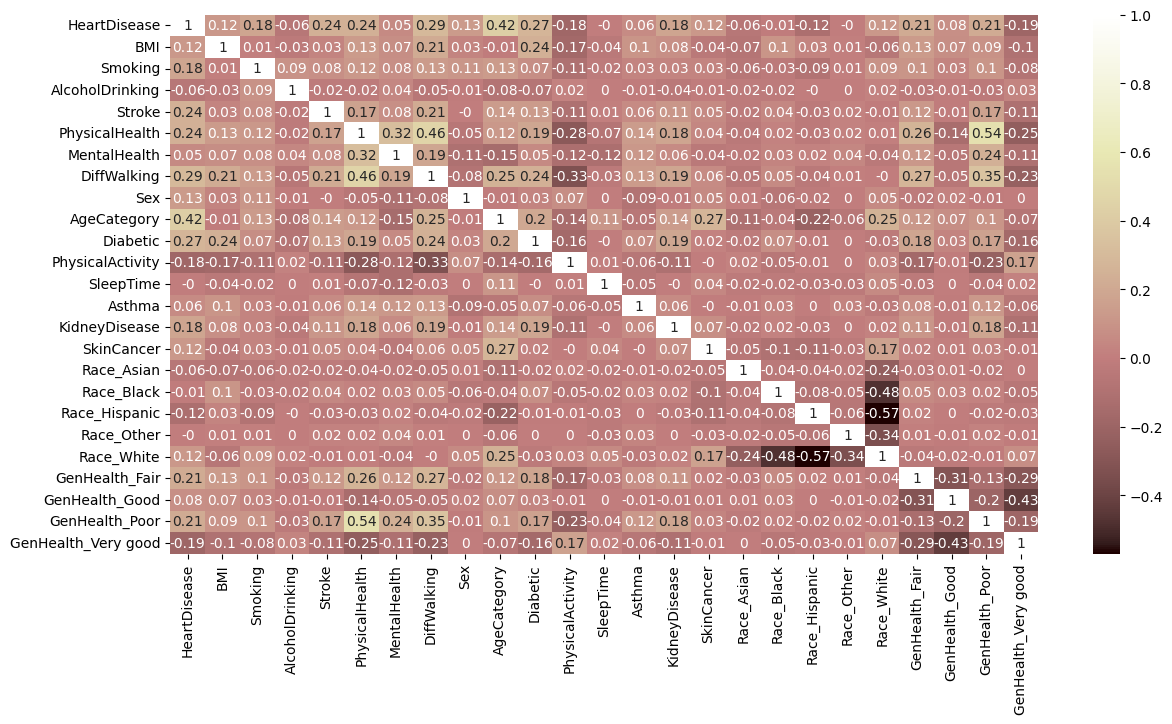

In [17]:
encoder = OrdinalEncoder()
df['AgeCategory'] = encoder.fit_transform(df[['AgeCategory']])
df['AgeCategory'] = df['AgeCategory'].astype(int)
df = pd.get_dummies(df, columns=['Race', 'GenHealth'], drop_first=True)
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'pink')

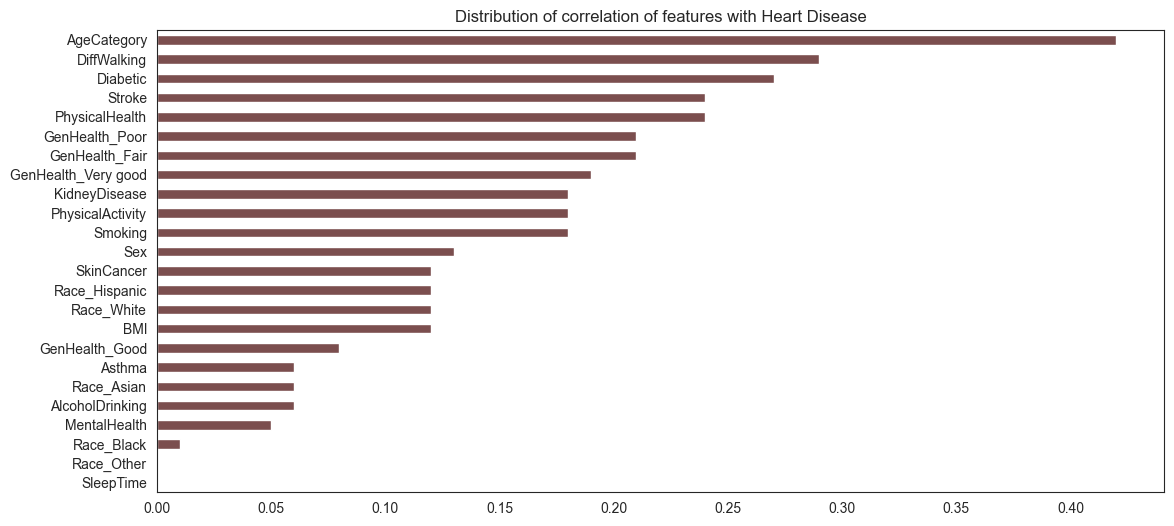

In [18]:
sns.set_style('white')
sns.set_palette('pink')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features with Heart Disease')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

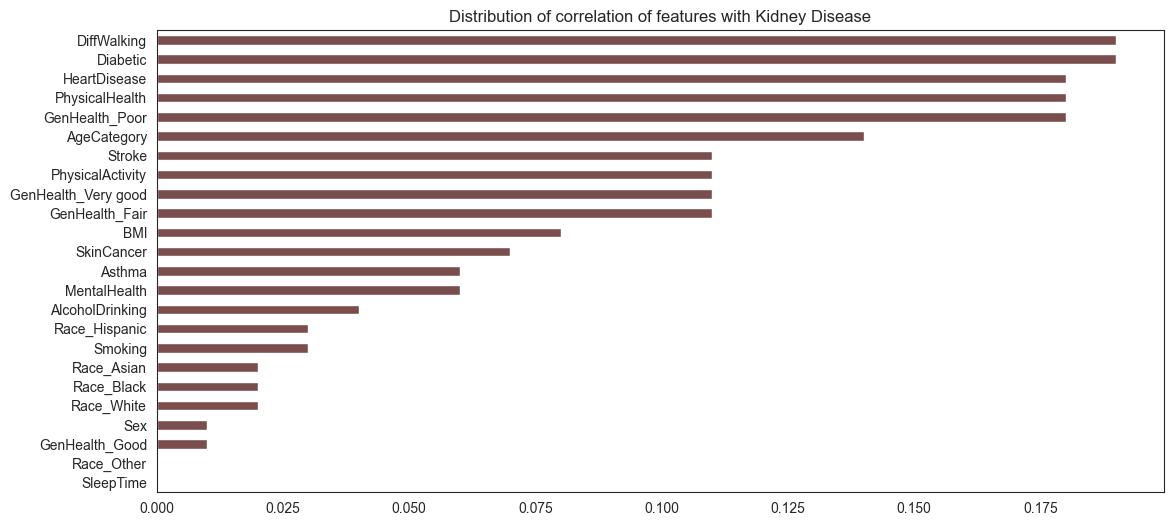

In [19]:
sns.set_style('white')
sns.set_palette('pink')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features with Kidney Disease')
abs(correlation['KidneyDisease']).sort_values()[:-1].plot.barh()
plt.show()

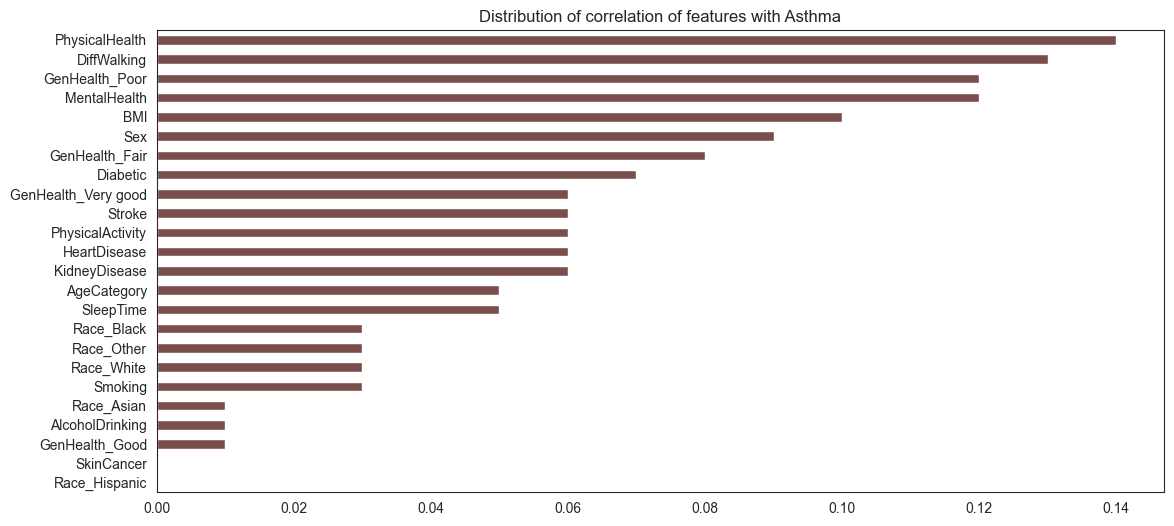

In [20]:
sns.set_style('white')
sns.set_palette('pink')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features with Asthma')
abs(correlation['Asthma']).sort_values()[:-1].plot.barh()
plt.show()

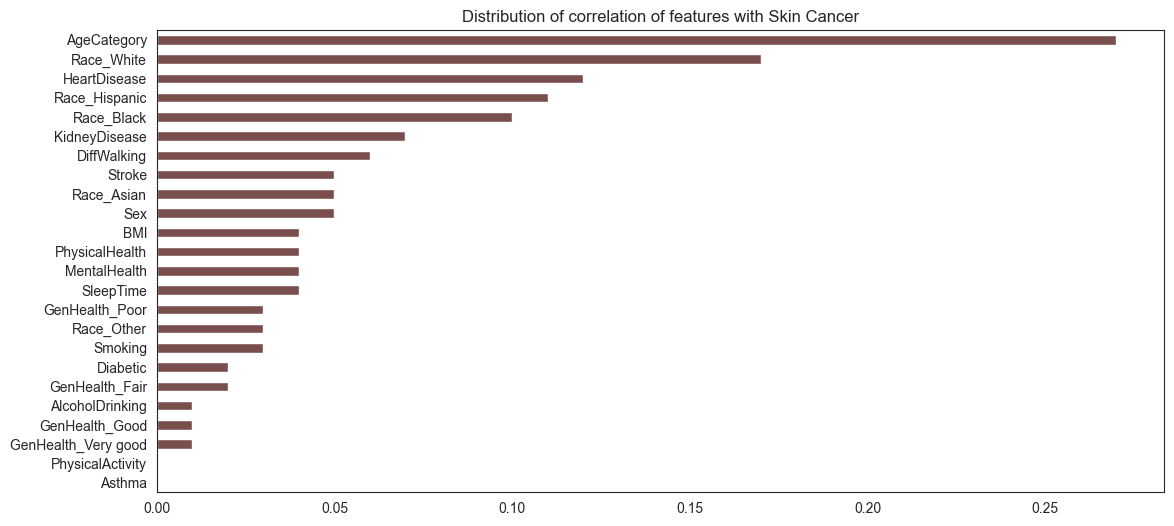

In [21]:
sns.set_style('white')
sns.set_palette('pink')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features with Skin Cancer')
abs(correlation['SkinCancer']).sort_values()[:-1].plot.barh()
plt.show()

/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_24728/1661997747.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="purple", label="HeartDisease", ax = ax)
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_24728/1661997747.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="pink", label="Normal", ax = ax)


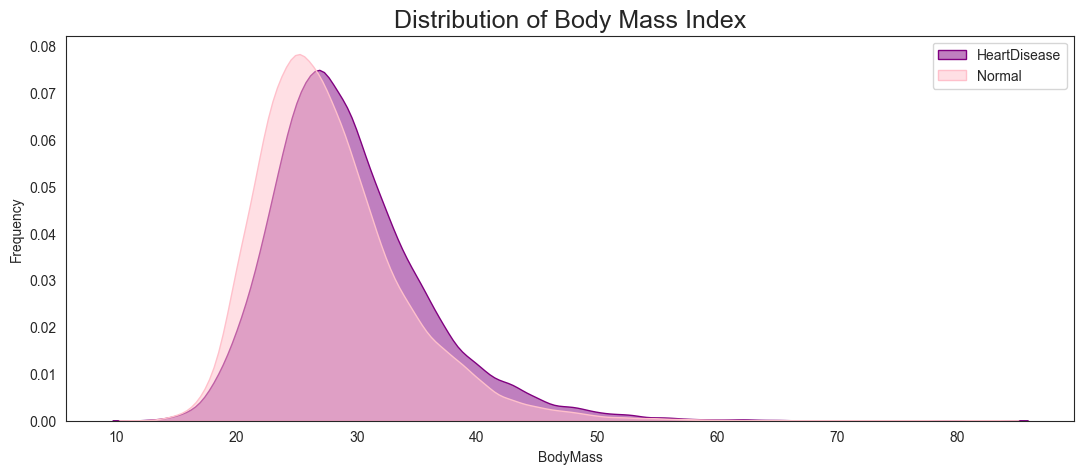

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="purple", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="pink", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()